## Annotating scatter plots + Web Visualization

This example shows how to annotate (label) scatter plots and also shows approaches to generating web ready visualizations.

Load the packages we will need.  Note if you get an error 'No module name mpld3'

1.  Open up the Annaconda command prompt
2.  Type 'conda install mpld3'

In [1]:
import pandas as panda
import matplotlib.pyplot as plt
from sklearn import linear_model
import numpy as np
import mpld3

%matplotlib inline

ImportError: No module named mpld3

This examples show how to annotate a simple scatter plot. 

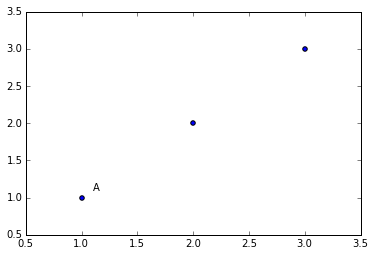

In [25]:
x=[1,2,3]
y=[1,2,3]
labels=['a','b','c']
plt.scatter(x,y)

plt.annotate('A',xy=(x[0]+.1,y[0]+.1))

Load the 2014 mlb team data

In [26]:
teams=panda.read_csv('../../data/baseball/MLBTeams2014.csv', sep=',');
print teams.head()

    Tm   W   L  BatAge  PAge    R     H   2B  3B   HR  ...    SO_a  HBP_a  BK  \
0  BAL  96  66    28.3  27.7  705  1434  264  16  211  ...    1174     59   2   
1  BOS  71  91    29.2  29.9  634  1355  282  20  123  ...    1213     47   5   
2  CHW  73  89    27.7  27.4  660  1400  279  32  155  ...    1152     69   3   
3  CLE  85  77    28.5  27.2  669  1411  284  23  142  ...    1450     58   2   
4  DET  90  72    29.8  28.5  757  1557  325  26  155  ...    1244     42   9   

   WP    BF  ERA+  BB9  SO9  SO/W  LOB.1  
0  42  6104   112  2.9  7.2  2.49   1127  
1  51  6231    97  3.0  7.4  2.52   1119  
2  75  6255    90  3.5  7.2  2.07   1174  
3  56  6193   104  2.8  8.9  3.13   1135  
4  43  6191   100  2.9  7.7  2.69   1124  

[5 rows x 49 columns]


Draw a scatterplot and annotate based on this [example](http://stackoverflow.com/questions/5147112/matplotlib-how-to-put-individual-tags-for-a-scatter-plot).  

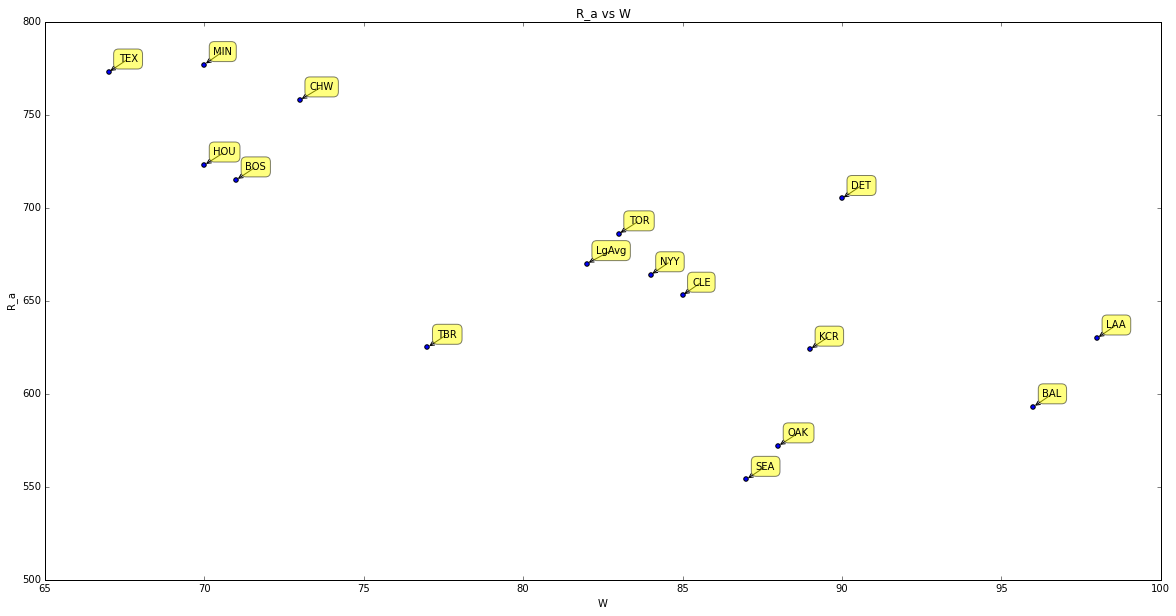

In [27]:
xstr='W'
ystr='R_a'
zstr='3B'

x=teams[xstr]
y=teams[ystr]
z=teams[zstr]
#y=teams['R']-teams['R_a']

plt.figure(figsize=(20,10))
plt.scatter(x, y)#, s=5000*(z/z.min()-.95))
plt.title(ystr+" vs "+xstr)
plt.xlabel(xstr)
plt.ylabel(ystr)
#

for label,xc,yc in zip(teams.Tm,x,y):
    plt.annotate(label,xy=(xc,yc),xytext = (10, 10),
        textcoords = 'offset points', bbox = dict(boxstyle = 'round,pad=0.5', fc = 'yellow', alpha = 0.5),
        arrowprops = dict(arrowstyle = '->', connectionstyle = 'arc3,rad=0'))

Use the [mpld3](http://mpld3.github.io/) library to export a plot to an html (with d3.js) file.   This html file is now ready to display in any browser (try loading it into your browser). 

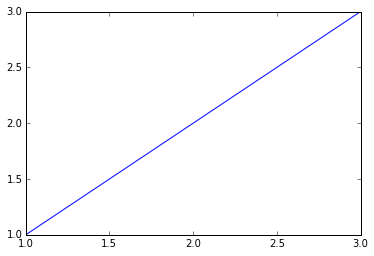

In [28]:
fig=plt.figure()
plt.plot([1,2,3],[1,2,3])
mpld3.save_html(fig,'simple.html')

We are going to use [list comprehension]0(http://www.pythonforbeginners.com/lists/list-comprehensions-in-python/) to create a list of labels for each point in a scatterplot.  So first let's do some simple examples of list comprehension.

In [29]:
print [str(i*i)+' hello' for i in[1,2,3]]

test=['boston', 'toronto', 'cleveland']
homeruns=[40,50,60]
[test[i]+str(homeruns[i]) for i in [0,1,2]]

['1 hello', '4 hello', '9 hello']


['boston40', 'toronto50', 'cleveland60']

In this example we create a scatter plot, we create a list of labels using list comprehension, then use the mpld3 library to export the plot to an interactive html file. 

In [30]:
fig, ax = plt.subplots(figsize=(10,8));

scatter=ax.scatter(x,y, s=100, alpha=0.3)

ax.set_title("MLB 2014: Runs Scored vs. Wins", size=20)

# create labels using list composition

labels=[teams.ix[i]['Tm']+': '+str(teams.ix[i]['W'])+'-'+str(teams.ix[i]['L'])+'   HR: '+str(teams.ix[i]['HR']) for i in teams.index]
print labels
print
ax.grid(color='white', linestyle='solid')

tooltip = mpld3.plugins.PointLabelTooltip(scatter, labels=labels)
mpld3.plugins.connect(fig, tooltip)
mpld3.save_html(fig, "teams.html")teams.index
mpld3.display()


['BAL: 96-66   HR: 211', 'BOS: 71-91   HR: 123', 'CHW: 73-89   HR: 155', 'CLE: 85-77   HR: 142', 'DET: 90-72   HR: 155', 'HOU: 70-92   HR: 163', 'KCR: 89-73   HR: 95', 'LAA: 98-64   HR: 155', 'MIN: 70-92   HR: 128', 'NYY: 84-78   HR: 147', 'OAK: 88-74   HR: 146', 'SEA: 87-75   HR: 136', 'TBR: 77-85   HR: 117', 'TEX: 67-95   HR: 111', 'TOR: 83-79   HR: 177', 'LgAvg: 82-80   HR: 144']



Here is an example that shows how to create a web ready scatter plot with tool tips using [Bokeh](http://bokeh.pydata.org/en/latest/)

In [45]:
from bokeh.plotting import figure,show,output_file
from bokeh.models import ColumnDataSource, HoverTool

p = figure(plot_width=1400, plot_height=800)

# p.circle creates a scatter plot with circles
p.circle(x="W", y="R_a", source=ColumnDataSource(teams), size=23)

# define an output file -- this file will be html that you can integrate into a website
output_file("mlb_bokeh.html")

# define a hovertool... this gives you a tool tip 
hover = HoverTool()
hover.tooltips = [('Team', '@Tm'), ('HR', '@HR')]
p.add_tools(hover)

show(p)
